<a href="https://colab.research.google.com/github/Misha-private/Demo-repo/blob/main/NN_level_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Input data for level xx

In [12]:
import numpy as np
from google.colab import drive
import os

def is_drive_mounted():
  return os.path.exists('/content/drive')

if not is_drive_mounted():
  drive.mount('/content/drive')

# Save the array on Google Drive (if mounted)
x_train_lev50 = np.load('/content/drive/MyDrive/Datasets/x_train_lev50.npy')  # 2 x
x_test_lev50 = np.load('/content/drive/MyDrive/Datasets/x_test_lev50.npy')    # 2 x

y_test = np.load('/content/drive/MyDrive/Datasets/y_test.npy')
y_train = np.load('/content/drive/MyDrive/Datasets/y_train.npy')

### NN with 6 layers

In [13]:
x_train = x_train_lev50  # 1 x
x_test = x_test_lev50    # 1 x

print(x_train.shape)
print(x_test.shape)

new_features = x_test

(60, 6)
(16, 6)


In [14]:
n_test = x_test.shape[0]
n_test


16

In [15]:
y_train.shape

(60, 6)

Streaming output truncated to the last 5000 lines.
iter, MSE = 14000 ... 0.045614182138700055
iter, MSE = 14002 ... 0.04560789860448157
iter, MSE = 14004 ... 0.045601621307487634
iter, MSE = 14006 ... 0.04559535026378853
iter, MSE = 14008 ... 0.0455890854893524
iter, MSE = 14010 ... 0.04558282700004514
iter, MSE = 14012 ... 0.045576574811630174
iter, MSE = 14014 ... 0.0455703289397684
iter, MSE = 14016 ... 0.04556408940001795
iter, MSE = 14018 ... 0.04555785620783416
iter, MSE = 14020 ... 0.045551629378569373
iter, MSE = 14022 ... 0.04554540892747276
iter, MSE = 14024 ... 0.04553919486969035
iter, MSE = 14026 ... 0.04553298722026473
iter, MSE = 14028 ... 0.04552678599413505
iter, MSE = 14030 ... 0.04552059120613686
iter, MSE = 14032 ... 0.04551440287100198
iter, MSE = 14034 ... 0.04550822100335847
iter, MSE = 14036 ... 0.04550204561773042
iter, MSE = 14038 ... 0.045495876728537964
iter, MSE = 14040 ... 0.04548971435009704
iter, MSE = 14042 ... 0.04548355849661948
iter, MSE = 14044 ... 

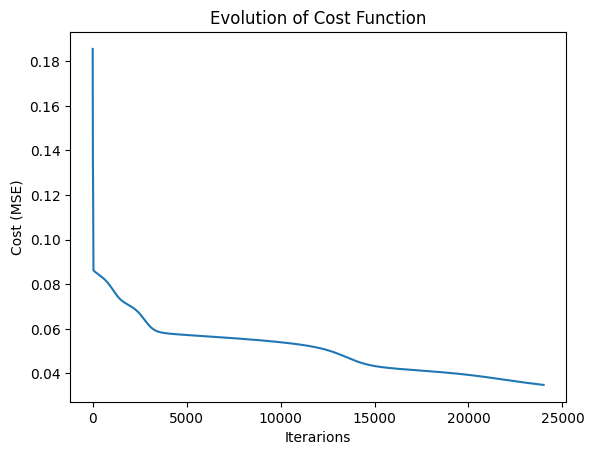


Considering a new situation
y_sol=[
[0.2636770394453697, 0.5853852338793601, 0.3992694151756335, 0.27460647257483395, 0.2915525004892186, 0.0729827371470206] ,
[0.7467168317615261, 0.5528650659512215, 0.6888456426170046, 0.27844965794938864, 0.5620562023520355, 0.6232876605570362] ,
[0.6678961180069858, 0.4756933663994057, 0.7050065860489954, 0.5195743030208535, 0.7390272734847508, 0.8233219412212436] ,
[0.438267746065836, 0.5292061340164773, 0.546292224645892, 0.806233655208517, 0.5577496166605989, 0.5482366185206896] ,
[0.5539530996933325, 0.7131403590840157, 0.8108806684761896, 0.488566232352183, 0.5061149610546372, 0.621578818804857] ,
[0.8218432275389238, 0.5231343950788301, 0.542172556779438, 0.6309663846597283, 0.4037218959815406, 0.5139476501591642] ,
[0.8727122677184661, 0.2253537898609293, 0.19613858678842094, 0.876733313368729, 0.5874021386323699, 0.5699957118126582] ,
[0.8138383657819864, 0.5865133776185371, 0.49887171742456826, 0.674075683137107, 0.2747663094286244, 0.352

In [22]:
#
# NN with 6 input cells, 6 layers and 6 output cells
#
import numpy as np
from numpy import exp, array, random, dot


class NeuronLayer():
    def __init__(self, number_of_neurons, number_of_inputs_per_neuron):
        self.synaptic_weights = 2 * random.random((number_of_inputs_per_neuron, number_of_neurons)) - 1

        self.synaptic_biases = np.zeros(number_of_neurons)


class NeuralNetwork():

    def __init__(self, layer1, layer2, layer3, layer4, layer5, layer6):
        self.layer1 = layer1
        self.layer2 = layer2
        self.layer3 = layer3
        self.layer4 = layer4
        self.layer5 = layer5
        self.layer6 = layer6

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    def __relu(self, x):
        return np.maximum(0, x)

    def __relu_derivative(self, x):
        return np.where(x > 0, 1, 0)


    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, err_acum,iter_acum,
              number_of_training_iterations, iteration_increment):

        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network
            output_from_layer_1, output_from_layer_2, output_from_layer_3,\
            output_from_layer_4, output_from_layer_5, output_from_layer_6 =\
            self.think(training_set_inputs)

            layer6_error = training_set_outputs  - output_from_layer_6
            layer6_delta = layer6_error * self.__sigmoid_derivative(output_from_layer_6)

            if iteration%iteration_increment==0 :
              mse = np.mean(layer6_error**2)
              err_acum.append(mse)
              iter_acum.append(iteration)

              print(f"iter, MSE = {iteration} ... {mse}")

            layer5_error = layer6_delta.dot(self.layer6.synaptic_weights.T)
            layer5_delta = layer5_error * self.__sigmoid_derivative(output_from_layer_5)

            layer4_error = layer5_delta.dot(self.layer5.synaptic_weights.T)
            layer4_delta = layer4_error * self.__sigmoid_derivative(output_from_layer_4)

            layer3_error = layer4_delta.dot(self.layer4.synaptic_weights.T)
            layer3_delta = layer3_error * self.__sigmoid_derivative(output_from_layer_3)

            layer2_error = layer3_delta.dot(self.layer3.synaptic_weights.T)
            layer2_delta = layer2_error * self.__sigmoid_derivative(output_from_layer_2)

            layer1_error = layer2_delta.dot(self.layer2.synaptic_weights.T)
            layer1_delta = layer1_error * self.__sigmoid_derivative(output_from_layer_1)


            # Calculate how much to adjust the weights by
            layer1_adjustment = training_set_inputs.T.dot(layer1_delta)
            layer2_adjustment = output_from_layer_1.T.dot(layer2_delta)
            layer3_adjustment = output_from_layer_2.T.dot(layer3_delta)
            layer4_adjustment = output_from_layer_3.T.dot(layer4_delta)
            layer5_adjustment = output_from_layer_4.T.dot(layer5_delta)
            layer6_adjustment = output_from_layer_5.T.dot(layer6_delta)


            alpha = 0.0025
            #alpha = 0.003


            # Adjust the weights.
            self.layer1.synaptic_weights += layer1_adjustment * alpha
            self.layer2.synaptic_weights += layer2_adjustment * alpha
            self.layer3.synaptic_weights += layer3_adjustment * alpha
            self.layer4.synaptic_weights += layer4_adjustment * alpha
            self.layer5.synaptic_weights += layer5_adjustment * alpha
            self.layer6.synaptic_weights += layer6_adjustment * alpha


            # Adjust tje biases
            self.layer1.synaptic_biases += np.sum(layer1_delta, axis=0) * alpha
            self.layer2.synaptic_biases += np.sum(layer2_delta, axis=0) * alpha
            self.layer3.synaptic_biases += np.sum(layer3_delta, axis=0) * alpha
            self.layer4.synaptic_biases += np.sum(layer4_delta, axis=0) * alpha
            self.layer5.synaptic_biases += np.sum(layer5_delta, axis=0) * alpha
            self.layer6.synaptic_biases += np.sum(layer6_delta, axis=0) * alpha



    # Plot MSE
    def plot_mse(self, err_acum, iter_acum):
      import matplotlib.pyplot as plt
      plt.plot(iter_acum, err_acum)
      plt.xlabel('Iterarions')
      plt.ylabel('Cost (MSE)')
      plt.title('Evolution of Cost Function')
      plt.show()

    # The neural network thinks.
    def think(self, inputs):
        output_from_layer1 = self.__sigmoid(dot(inputs,             self.layer1.synaptic_weights))
        output_from_layer2 = self.__sigmoid(dot(output_from_layer1, self.layer2.synaptic_weights))
        output_from_layer3 = self.__sigmoid(dot(output_from_layer2, self.layer3.synaptic_weights))
        output_from_layer4 = self.__sigmoid(dot(output_from_layer3, self.layer4.synaptic_weights))
        output_from_layer5 = self.__sigmoid(dot(output_from_layer4, self.layer5.synaptic_weights))
        output_from_layer6 = self.__sigmoid(dot(output_from_layer5, self.layer6.synaptic_weights))

        output_from_layer1 = self.__sigmoid(dot(inputs,             self.layer1.synaptic_weights)+self.layer1.synaptic_biases)
        output_from_layer2 = self.__sigmoid(dot(output_from_layer1, self.layer2.synaptic_weights)+self.layer2.synaptic_biases)
        output_from_layer3 = self.__sigmoid(dot(output_from_layer2, self.layer3.synaptic_weights)+self.layer3.synaptic_biases)
        output_from_layer4 = self.__sigmoid(dot(output_from_layer3, self.layer4.synaptic_weights)+self.layer4.synaptic_biases)
        output_from_layer5 = self.__sigmoid(dot(output_from_layer4, self.layer5.synaptic_weights)+self.layer5.synaptic_biases)
        output_from_layer6 = self.__sigmoid(dot(output_from_layer5, self.layer6.synaptic_weights)+self.layer6.synaptic_biases)

        return output_from_layer1, output_from_layer2, output_from_layer3, output_from_layer4, output_from_layer5, output_from_layer6

    # The neural network prints its weights
    def print_weights(self):
        #print ("    Input layer (8 neurons each with num_data examples and num_data outputs)")
        #print ("    Layer 1 (`` neurons, each with 8 inputs): ")
        print (self.layer1.synaptic_weights)
        print (self.layer2.synaptic_weights)
        print (self.layer3.synaptic_weights)
        print (self.layer4.synaptic_weights)
        print (self.layer5.synaptic_weights)
        print (self.layer6.synaptic_weights)

#
# Main program
#
if __name__ == "__main__":

    #Seed the random number generator
    random.seed(1)

    # Create layer 1 (num_data neurons, each with 8 inputs)
    layer1 = NeuronLayer(20, 6)

    # Create layer 2 (num_data neurons with num_data inputs)
    layer2 = NeuronLayer(30, 20)

    # Create layer 3
    layer3 = NeuronLayer(50, 30)

    # Create layer 4
    layer4 = NeuronLayer(50, 50)

    # Create layer 5
    layer5 = NeuronLayer(30, 50)

    # Create layer 6
    layer6 = NeuronLayer(6, 30)


    # Combine the layers to create a neural network
    neural_network = NeuralNetwork(layer1, layer2, layer3, layer4, layer5, layer6)

    #print ("Stage 1) Random starting synaptic weights: ")
    #neural_network.print_weights()

    # The training set (features and labels)

    training_set_inputs = x_train

    training_set_outputs = y_train


    # Train the neural network using the training set
    # Do it num_data,000 times and make small adjustments each time.

    err_acum = []
    iter_acum = []

    neural_network.train(training_set_inputs, training_set_outputs, err_acum, iter_acum,
                         iteration_increment=2, number_of_training_iterations=24000)
    neural_network.plot_mse(err_acum, iter_acum)


    print('\nConsidering a new situation')

    hidden_stata1,hidden_state2, hidden_state3, hidden_state4, hidden_state5, output = neural_network.think(new_features)

    # --------------------- diagonostics -----------------------

    y_sol = [[] for _ in range(16)] # Initialize y_sol as a list of lists
    y_sol = output.tolist()

    print('y_sol=[')
    for i in range(n_test):
      if i < n_test :
        print(y_sol[i],',')
      else :
        print(y_sol[i])
    print(']')

     # --------------------- diagonostics -----------------------

In [23]:
y_sol=[
[0.2636770394453697, 0.5853852338793601, 0.3992694151756335, 0.27460647257483395, 0.2915525004892186, 0.0729827371470206] ,
[0.7467168317615261, 0.5528650659512215, 0.6888456426170046, 0.27844965794938864, 0.5620562023520355, 0.6232876605570362] ,
[0.6678961180069858, 0.4756933663994057, 0.7050065860489954, 0.5195743030208535, 0.7390272734847508, 0.8233219412212436] ,
[0.438267746065836, 0.5292061340164773, 0.546292224645892, 0.806233655208517, 0.5577496166605989, 0.5482366185206896] ,
[0.5539530996933325, 0.7131403590840157, 0.8108806684761896, 0.488566232352183, 0.5061149610546372, 0.621578818804857] ,
[0.8218432275389238, 0.5231343950788301, 0.542172556779438, 0.6309663846597283, 0.4037218959815406, 0.5139476501591642] ,
[0.8727122677184661, 0.2253537898609293, 0.19613858678842094, 0.876733313368729, 0.5874021386323699, 0.5699957118126582] ,
[0.8138383657819864, 0.5865133776185371, 0.49887171742456826, 0.674075683137107, 0.2747663094286244, 0.3521994802276028] ,
[0.2770394051135016, 0.4194188655185053, 0.4247384306103012, 0.4498672207843345, 0.6361563293616583, 0.40127257337802047] ,
[0.4133320609502769, 0.4286242121960293, 0.3751552536835843, 0.42055125336095284, 0.5294437382503673, 0.316020426311866] ,
[0.14569383999534852, 0.44103463280946803, 0.5334967955877707, 0.08386449517766088, 0.9139701978494508, 0.7363787575204122] ,
[0.11528927886072972, 0.4827199310929031, 0.5349124294355078, 0.7496217045734775, 0.21947199158600417, 0.09580180957792107] ,
[0.7702579660280123, 0.6738959491017639, 0.5529025600426416, 0.6102438115607853, 0.21255605207853362, 0.25843708414259026] ,
[0.8349501281001095, 0.31846975956834306, 0.652941267355677, 0.5488202010415093, 0.7942210864404718, 0.8804433136066864] ,
[0.7522703897301424, 0.6061312513113686, 0.7475597849223697, 0.6220010776387107, 0.5432512365399932, 0.7264082184487811] ,
[0.5335890584193738, 0.7596849178240808, 0.6339356577410316, 0.40846225918441736, 0.1893397337712531, 0.14362463702649717] ,
]

### Accuracy

In [24]:
import numpy as np
def rmse(yt,yn):
  return np.sqrt(np.mean((yt-yn)**2))

res = [[] for _ in range(16)]


for i in range(16):
  res[i] = rmse(np.array(y_test[i]),np.array(y_sol[i]))
  print(res[i])

print(' ')
aver = (np.sum(res)- (np.min(res)+np.max(res)) )/14
print('ERROR:', aver)


0.1163092845911597
0.184196231034087
0.08145116835869089
0.22220933705570867
0.1268663510208115
0.2686602024864415
0.18564944465102437
0.2149791393131345
0.24283105711853856
0.15172819520909916
0.13154014557751928
0.1917230373691359
0.39163991584725627
0.18756399957520664
0.20910138605116985
0.13363976129830202
 
ERROR: 0.18335696945366703
